**Algerian Forest Fire** dataset is a collection of data related to forest fires in Algeria. It typically includes various attributes such as temperature, humidity, wind speed, and other environmental factors, along with the corresponding fire weather index (FWI) or some measure of fire intensity. This dataset is often used for predictive modeling tasks, aiming to predict the severity or occurrence of forest fires based on the given environmental variables.

## Importing Libraries

In [640]:
# Import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, LinearRegression, ElasticNet, Lasso
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Data Loading

In [641]:
# File path
file_path = 'Algerian_forest_fires_cleaned.csv'

# Reading the dataset into a DataFrame
df = pd.read_csv(file_path)

# Displaying the first few rows of the DataFrame
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


## Data Preprocessing

In [642]:
# Drop unnecessary columns
df.drop(columns=['day', 'month', 'year'], inplace=True)

# Identifying null values
null_values = df.isnull()

# Counting the number of null values in each column
null_count = null_values.sum()

# Displaying the total count of null values
print("\nTotal number of Null values per column:\n", null_count)


Total number of Null values per column:
 Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


Since there is no null values we can proceed directly to data analysis without the need for additional preprocessing steps related to handling missing data. 

In [643]:
# Randomly selecting 5 records for later evaluation
unseen_data = df.sample(n=5, random_state=42)

# Creating a new DataFrame excluding the 5 unseen records
df_excluded = df.drop(unseen_data.index)

# Defining features (X) and the dependent variable (y)
X = df_excluded[['Temperature', 'RH', 'Ws']]
y = df_excluded['FWI']


## Exploratory Data Analysis

In [644]:
# Displaying the descriptive statistics for numeric columns
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [645]:
'''# Define a function to trim outliers based on IQR
def trim_outliers_iqr(df, columns, k=1.5):
    trimmed_df = df.copy()
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - k * iqr
        upper_bound = q3 + k * iqr
        trimmed_df = trimmed_df[(trimmed_df[column] >= lower_bound) & (trimmed_df[column] <= upper_bound)]
    return trimmed_df


### Note: We wont be trimming the outliers since R2 is lower when I attempted to trim the ouliers
'''

'# Define a function to trim outliers based on IQR\ndef trim_outliers_iqr(df, columns, k=1.5):\n    trimmed_df = df.copy()\n    for column in columns:\n        q1 = df[column].quantile(0.25)\n        q3 = df[column].quantile(0.75)\n        iqr = q3 - q1\n        lower_bound = q1 - k * iqr\n        upper_bound = q3 + k * iqr\n        trimmed_df = trimmed_df[(trimmed_df[column] >= lower_bound) & (trimmed_df[column] <= upper_bound)]\n    return trimmed_df\n\n\n### Note: We wont be trimming the outliers since R2 is lower when I attempted to trim the ouliers\n'

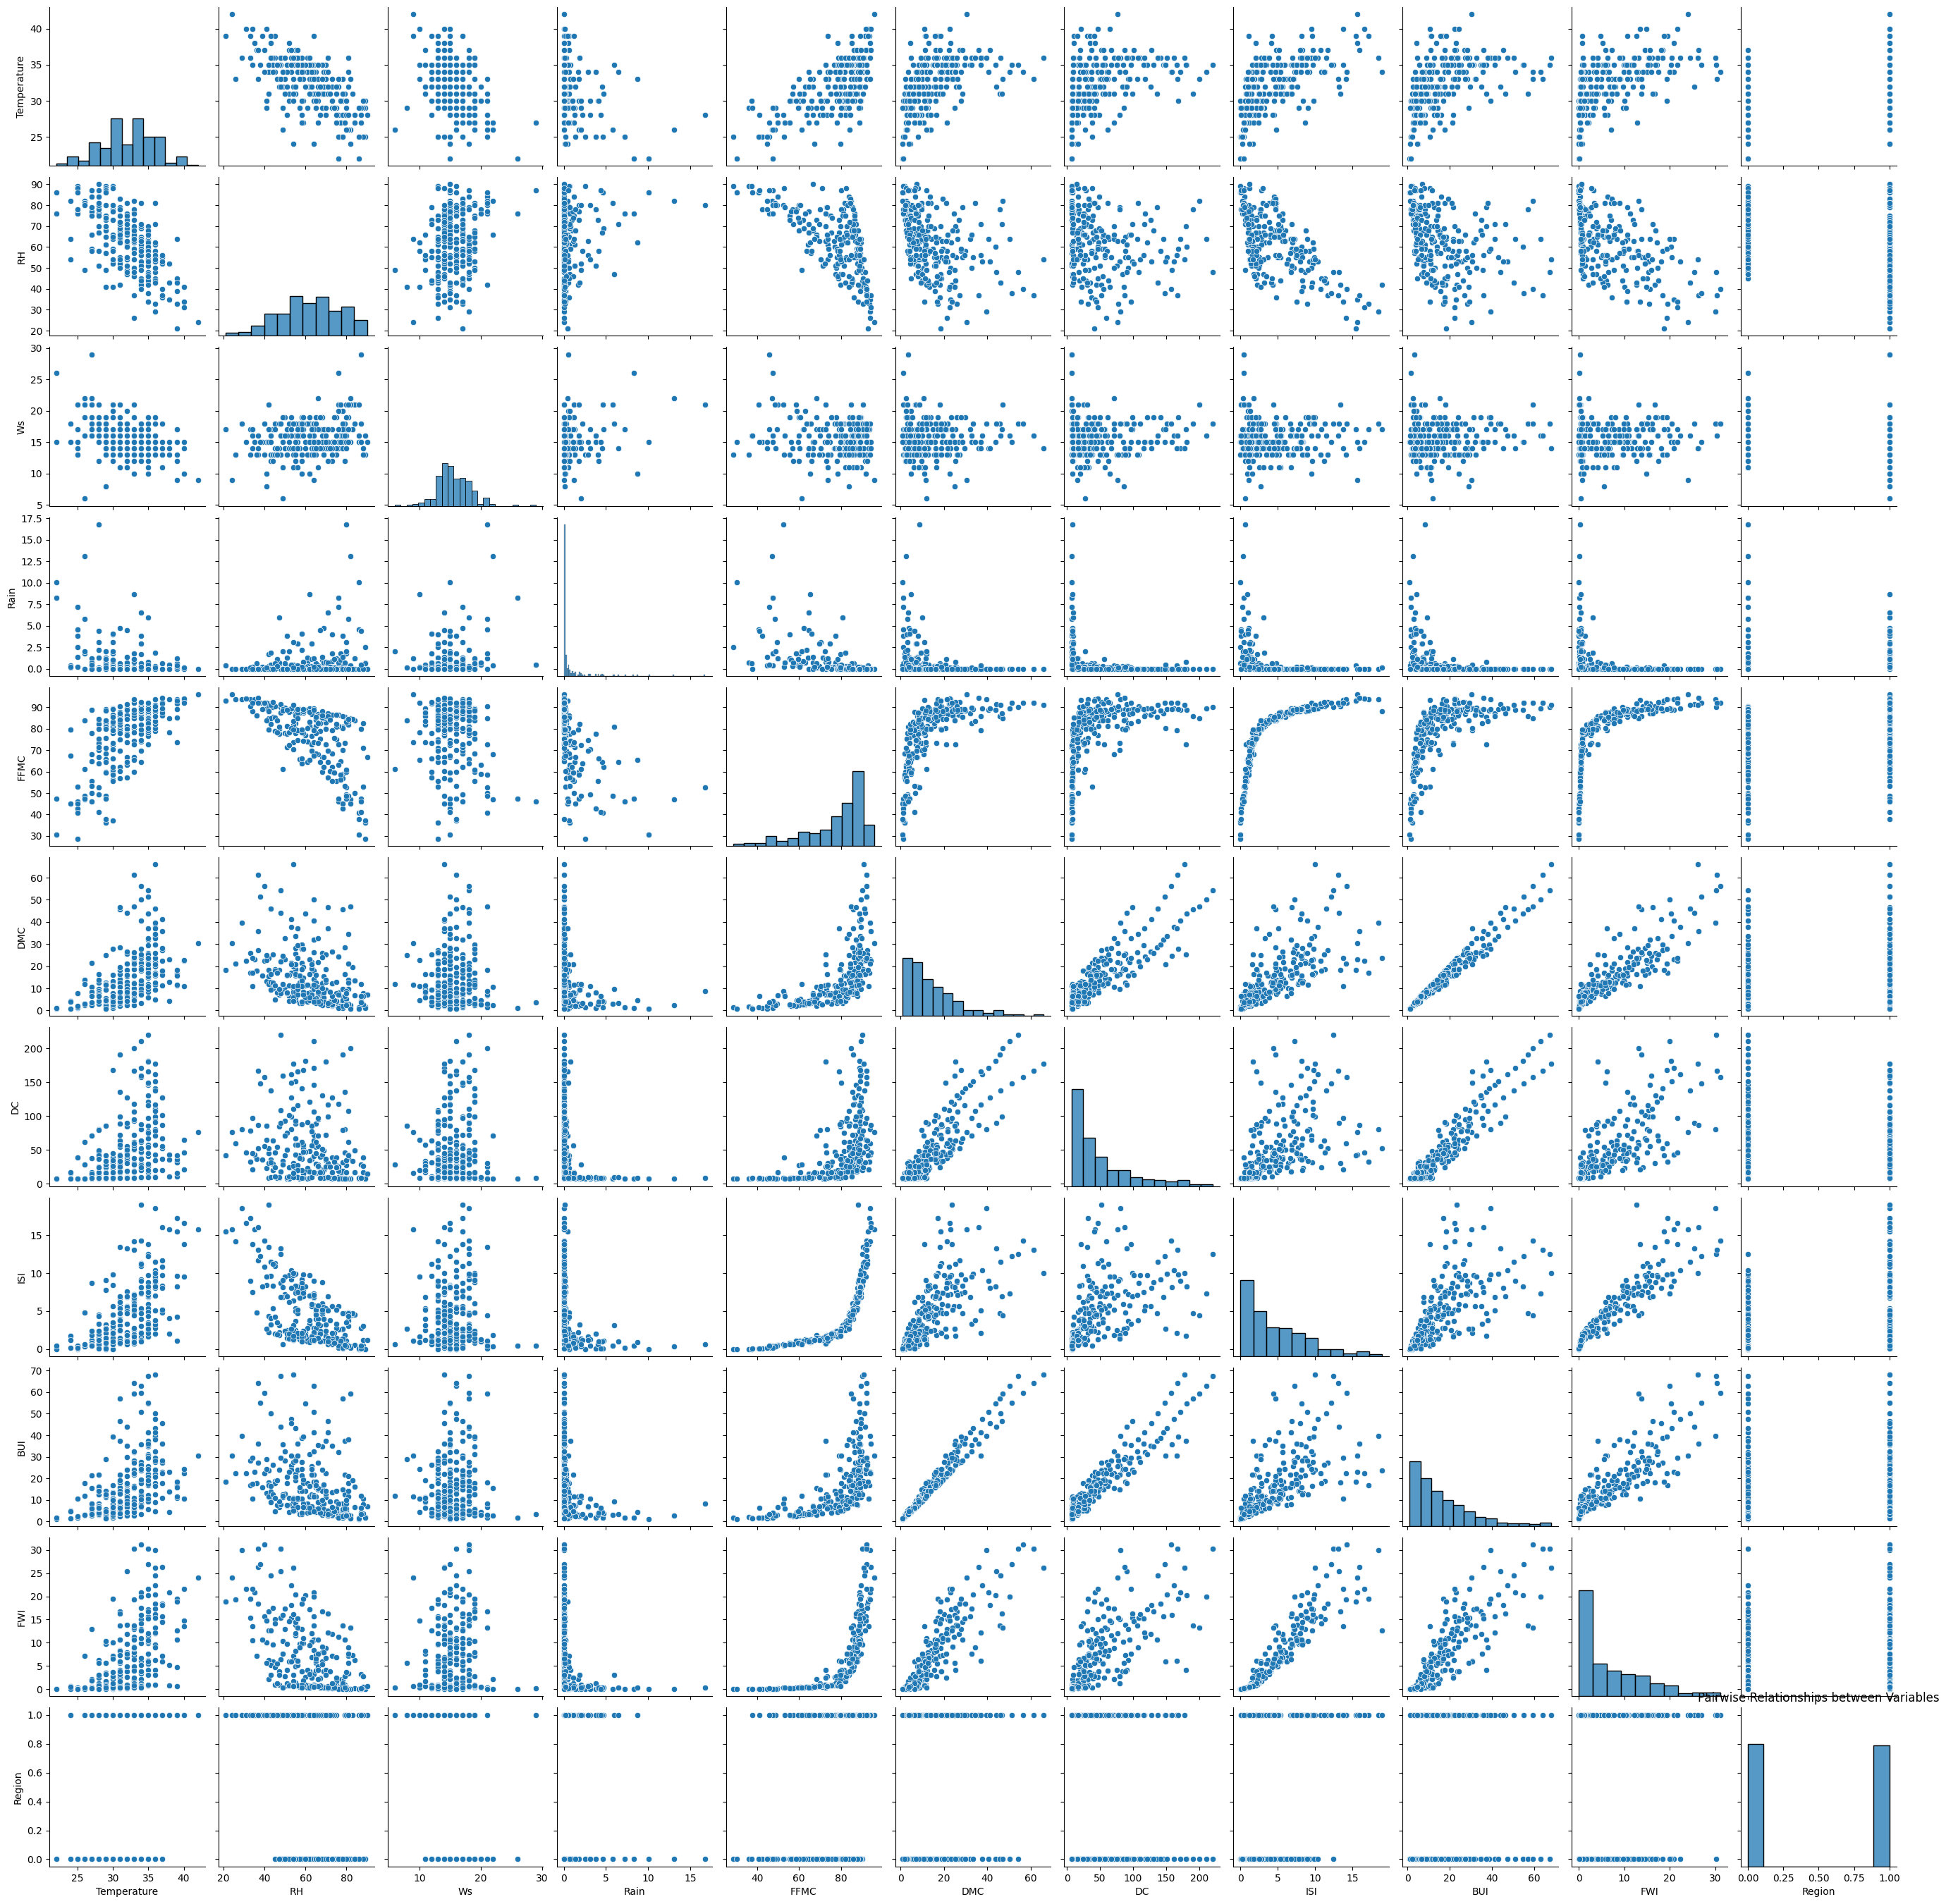

In [646]:
# Visualize pairwise relationships between variables in the DataFrame
sns.pairplot(df)

# Add caption
plt.title('Pairwise Relationships between Variables')

# Display the plot
plt.show()


C:\Users\HP G8\AppData\Local\Temp\ipykernel_11024\426385852.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="coolwarm", annot=True)


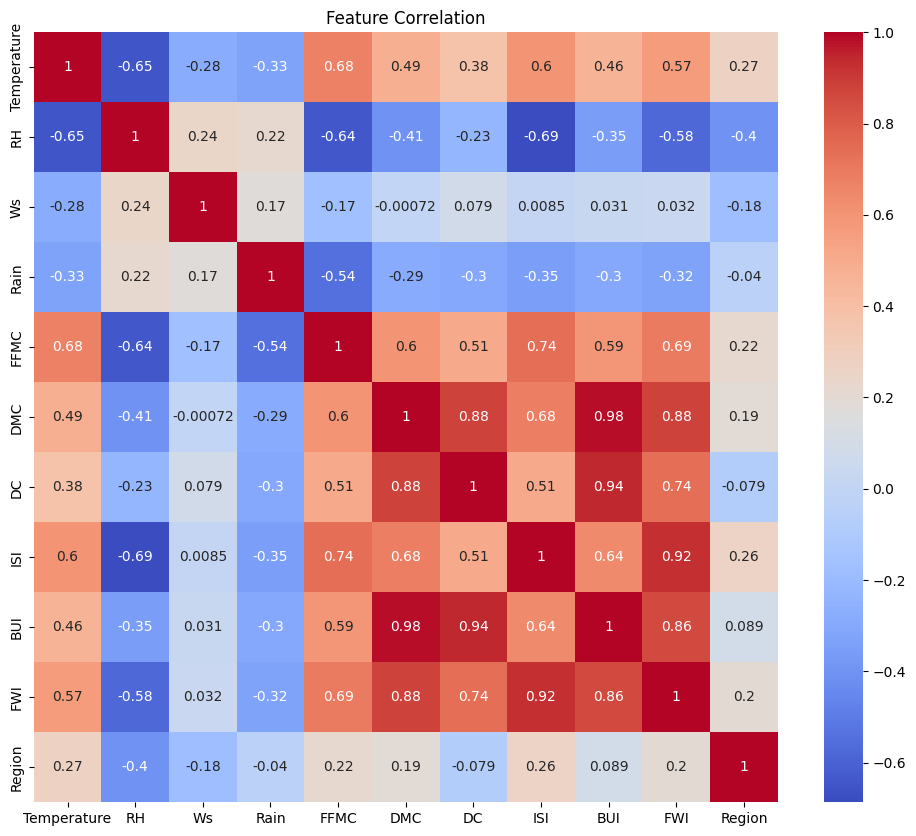

In [647]:
# Generate a heatmap to depict the correlation among all features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

# Add title
plt.title('Feature Correlation')

# Display the plot
plt.show()

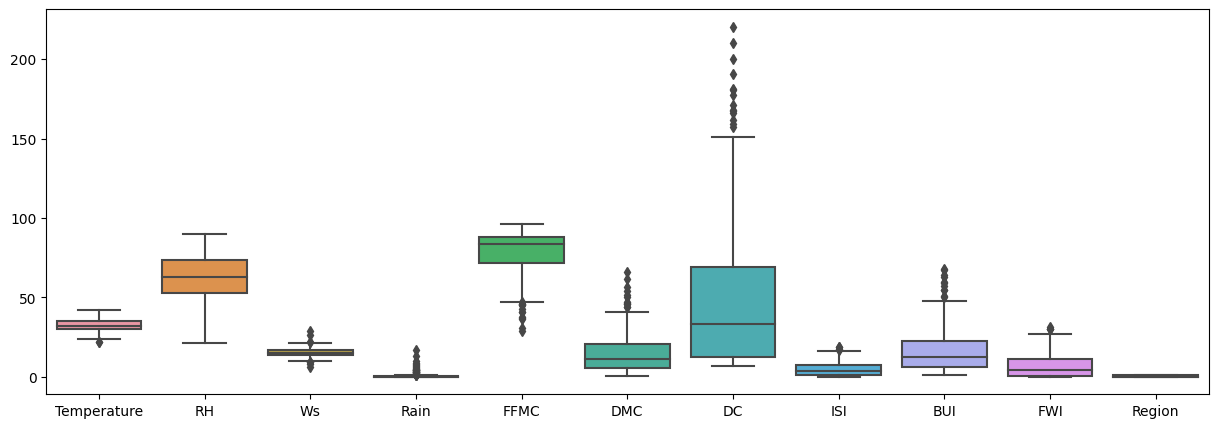

In [648]:
# Visualize boxplots for all columns
plt.figure(figsize=(15, 5))
sns.boxplot(data=df)

# Display the plot
plt.show()


## Model Training and Evaluation

In [649]:
# Splitting the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [650]:
# Creating a StandardScaler object
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming it
X_train_sc = scaler.fit_transform(X_train)

# Transforming the testing data using the scaler fitted on the training data
X_test_sc = scaler.transform(X_test)


In [651]:
# Displaying the shapes of the training and testing datasets
print(f"Shape of X_train: {X_train_sc.shape}")
print(f"Shape of X_test: {X_test_sc.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (190, 3)
Shape of X_test: (48, 3)
Shape of y_train: (190,)
Shape of y_test: (48,)


In [652]:
# Creating a linear regression model and fitting it to the training data
lr = LinearRegression().fit(X_train_sc, y_train)


In [653]:
# Printing the coefficients and intercept of the linear regression model
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)


Coefficients: [ 2.71598318 -3.22199657  1.68119103]
Intercept: 7.019999999999999


In [654]:
# Calculating the predicted values on the testing data
y_test_pred = lr.predict(X_test_sc)


In [655]:
# Printing the metrics for the Linear Regression model
print("Metrics for Linear Regression model: ")
MAE = mean_absolute_error(y_test, y_test_pred)
MSE = mean_squared_error(y_test, y_test_pred)
R2 = r2_score(y_test, y_test_pred)
print('MAE:', MAE)
print('MSE:', MSE)
print('R2:', R2)


Metrics for Linear Regression model: 
MAE: 4.878110233777854
MSE: 38.70765194134835
R2: 0.3224930870586592


In [656]:

# Define the hyperparameter search space
param_dist = {'alpha': uniform(0.001, 100)}

# Create a Ridge regression model
ridge_model = Ridge()

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=ridge_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train_sc, y_train)  # Use scaled features

# Obtain the best hyperparameters
best_alpha = random_search.best_params_['alpha']
print("Best Alpha for training Ridge regression model:", best_alpha)

Best Alpha for training Ridge regression model: 3.4398521115218395


In [657]:
# Fit the Ridge model with the best hyperparameters to the scaled training data
Ridge_tuned = Ridge(alpha=best_alpha)  # Instantiate Ridge model with the best alpha
Ridge_tuned.fit(X_train_sc, y_train)   # Fit the Ridge model to the scaled training data

# Predicting using the tuned model
Ridge_pred = Ridge_tuned.predict(X_test_sc)

print("Metrics for Tuned Ridge Model:")  

# Calculate Mean Absolute Error, Mean Squared Error and R-squared for Tunned Ridge Model
MAE = mean_absolute_error(y_test, Ridge_pred)  
MSE = mean_squared_error(y_test, Ridge_pred)   
R2 = r2_score(y_test, Ridge_pred)              

# Print Mean Absolute Error, Mean Squared Error, R-squared for Tunned Ridge Model
print('MAE:', MAE)  
print('MSE:', MSE)  
print('R2:', R2)    

Metrics for Tuned Ridge Model:
MAE: 4.872686043876356
MSE: 38.646376114399146
R2: 0.32356560875067997


In [658]:
# Define the hyperparameter search space
param_dist = {'alpha': uniform(0.001, 100)}

# Create a Lasso regression model
lasso_model = Lasso()

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=lasso_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train_sc, y_train)  # Use scaled features

# Obtain the best hyperparameters
best_alpha = random_search.best_params_['alpha']
print("Best Alpha for training Lasso Regression model:", best_alpha)

Best Alpha for training Lasso Regression model: 0.5532117123602399


In [659]:
# Fit the Lasso model with the best hyperparameters to the scaled training data
lasso_tuned = Lasso(alpha=best_alpha)
lasso_tuned.fit(X_train_sc, y_train)

# Predict using the tuned model
lasso_pred = lasso_tuned.predict(X_test_sc)

# Calculate Mean Absolute Error, Mean Squared Error and R-squared for Tuned Lasso Model
print("Metrics for Tuned Lasso:")
MAE = mean_absolute_error(y_test, lasso_pred)
MSE = mean_squared_error(y_test, lasso_pred)
R2 = r2_score(y_test, lasso_pred)

# Print Mean Absolute Error, Mean Squared Error, R-squared for Tuned Lasso Model
print('MAE:', MAE)
print('MSE:', MSE)
print('R2:', R2)


Metrics for Tuned Lasso:
MAE: 4.876827027554829
MSE: 39.15113124514824
R2: 0.3147307899674765


In [660]:
# Define the hyperparameter search space
param_dist = {'alpha': uniform(0.001, 100)}

# Create an ElasticNet regression model
elastic_model = ElasticNet()

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=elastic_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train_sc, y_train)  # Use scaled features

# Get the best hyperparameters
best_alpha = random_search.best_params_['alpha']
print("Best Alpha for training ElasticNet regression model:", best_alpha)

Best Alpha for training ElasticNet regression model: 0.5532117123602399


In [661]:
# Fit the Elastic model with the best hyperparameters to the scaled training data
Elastic_tunned = ElasticNet(alpha=best_alpha)
Elastic_tunned.fit(X_train_sc, y_train)

# Predicting using the Elastic tunned model
Elastic_pred = Elastic_tunned.predict(X_test_sc)

# Calculate Mean Absolute Error, Mean Squared Error and R-squared for Tuned Elastic Mode
print("Metric for Tunned ElasticNet: ")
MAE = mean_absolute_error(y_test,Elastic_pred)
MSE = mean_squared_error(y_test, Elastic_pred)
R2 = r2_score(y_test, Elastic_pred)

# Print Mean Absolute Error, Mean Squared Error, R-squared for Tuned Elastic Model
print('MAE: ', MAE)
print('MSE: ',MSE)
print('R2: ', R2)

Metric for Tunned ElasticNet: 
MAE:  4.922382047071501
MSE:  39.26177176483107
R2:  0.31279422928303824


The three models exhibit a moderate level of predictive capability, explaining approximately 31-32% of the variance in fire intensity. The Tuned Ridge Regression model displays a slight enhancement compared to other linear regression models, suggesting that the regularization parameter (alpha) utilized in Ridge regression contributes to a marginally improved fit.

Note: I experimented with various feature engineering techniques, including outlier trimming, to enhance the model's performance. Additionally, I attempted to boost accuracy by employing Gradient Boosting and Random Forest Regressor models. Despite these efforts, I also explored the stacking ensemble method. However, none of these approaches yielded satisfactory results.

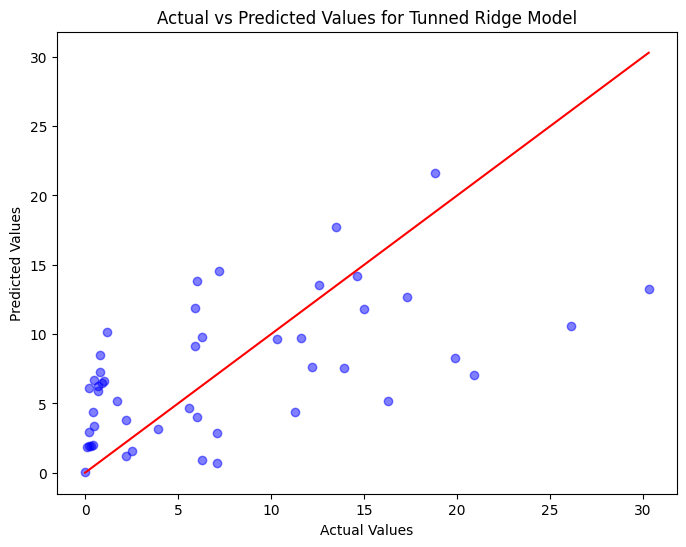

In [662]:
# Plot actual vs predicted values in Tunned Ridge Model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, Ridge_pred, color='blue', alpha=0.5)  # Scatter plot
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line for reference
plt.title('Actual vs Predicted Values for Tunned Ridge Model')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [663]:
import pickle  # Import the pickle module for serializing Python objects

# Serialize and save the 'Ridge_tunned' object to a file named 'CLJ1.pkl'
pickle.dump(Ridge_tunned, open('CLJ1.pkl','wb'))

# Serialize and save the 'scaler' object to a file named 'scaler1.pkl'
pickle.dump(scaler, open('scaler1.pkl', 'wb'))


In [664]:
def preprocess_data(df):
    # List of columns to keep
    columns_to_keep = ['Temperature', 'RH', 'Ws', 'FWI']

    # Drop all columns except the specified columns
    df = df[df.columns.intersection(columns_to_keep)]

    # Separate independent and dependent variables
    X = df.drop(columns=['FWI'])  # Independent variables
    y = df['FWI']  # Dependent variable

    # Load the scaler object from the 'scaler1.pkl' file
    with open('scaler1.pkl', 'rb') as file:
        scaler = pickle.load(file)

    # Scale the independent variables using the loaded scaler
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # Convert to DataFrame

    return X_scaled, y

In [665]:
# File path of the pickled model
pickle_file_path = 'CLJ1.pkl'

# Open the pickled model file in read-binary mode
with open(pickle_file_path, 'rb') as file:
    # Load the pickled model using pickle.load()
    loaded_model = pickle.load(file)


In [666]:
# Reorder the columns of the unseen_data DataFrame based on the desired order
desired_order = ['Temperature', 'RH', 'Ws', 'FWI']
unseen_records_ordered = unseen_data.reindex(columns=desired_order)

In [667]:
unseen_records_ordered.head()

,Temperature,RH,Ws,FWI
24,31,64,15,8.4
6,33,54,13,7.2
152,28,58,18,0.5
232,34,58,13,3.8
238,30,65,14,6.5


In [668]:
# Call the preprocess_data function with unseen_data as an argument
X_scaled, y = preprocess_data(unseen_data)

In [669]:
# Loaded_model is the trained model and X_scaled is your input data
prediction = loaded_model.predict(X_scaled)

# Print Prediction
print("Prediction:", prediction)

# Convert y to a NumPy array
y_array = np.array(y)
print("Actual Values:", y_array)  # Print y as an array

Prediction: [5.49154583 7.85537885 6.41005668 7.72607314 3.95590017]
Actual Values: [8.4 7.2 0.5 3.8 6.5]


c:\Users\HP G8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [670]:
print("Model evaluation metrics for pickled model: ")

# Calculate Mean Squared Error (MSE) between actual values (y) and predicted values (prediction)
MSE = mean_squared_error(y, prediction)

# Calculate Mean Absolute Error (MAE) between actual values (y) and predicted values (prediction)
MAE = mean_absolute_error(y, prediction)

# Calculate R-squared (R2) score between actual values (y) and predicted values (prediction)
R2 = r2_score(y, prediction)

# Print the calculated evaluation metrics for pickled model
print('MAE: ', MAE)
print('MSE: ', MSE)
print('R2: ', R2)


Model evaluation metrics for pickled model: 
MAE:  3.188812533824059
MSE:  13.140778257648037
R2:  -0.6447354382757631


 Based on the metrics above, it seems that the performance of the pickled model is suboptimal, as indicated by the relatively high MAE and MSE values and the negative R2 score.

## Incorporating/Modifying Features






In attempt to have a higher accuracy for prediction, we are going to look into adding more high correlated features that would help in increasing the prediction accuracy

In [671]:
# Select features with high impact on FWI
selected_features = ['Temperature', 'RH', 'ISI', 'Rain', 'FFMC', 'DMC', 'DC', 'BUI']

# Update variables with the new feature set
X_new = df[selected_features]
y_new = df['FWI']

# Split the data into a training set and a test set
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.20, random_state=42)

In [672]:
# Standardize the data
scaler_new = StandardScaler()
feature_names = X_train_new.columns.tolist()
X_train_sc_new = scaler_new.fit_transform(X_train_new)
X_test_sc_new = scaler_new.transform(X_test_new)
print('Feature names: ', feature_names)

Feature names:  ['Temperature', 'RH', 'ISI', 'Rain', 'FFMC', 'DMC', 'DC', 'BUI']


In [673]:

# Define the hyperparameter search space
param_dist = {'alpha': uniform(0.001, 100)}

# Create a Ridge regression model
ridge_model = Ridge()

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=ridge_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train_sc_new, y_train_new)  # Use scaled features

# Obtain the best hyperparameters
best_alpha = random_search.best_params_['alpha']
print("Best Alpha for training:", best_alpha)

Best Alpha for training: 3.4398521115218395


In [674]:
# Fit the Ridge model with the best hyperparameters to the scaled training data
Ridge_new = Ridge(alpha=best_alpha)
Ridge_new.fit(X_train_sc_new, y_train_new)

# Predicting using the tunned model
Ridge_pred = Ridge_new.predict(X_test_sc_new)

print("Metric for Tunned Ridge: ")
MAE = mean_absolute_error(y_test_new,Ridge_pred)
MSE = mean_squared_error(y_test_new, Ridge_pred)
R2 = r2_score(y_test_new, Ridge_pred)
print('MAE: ', MAE)
print('MSE: ',MSE)
print('R2: ', R2)

Metric for Tunned Ridge: 
MAE:  0.5208777015599249
MSE:  0.6606571009679025
R2:  0.9782021936984381


## Model Deployment

In [675]:
# Saving the tunned elastic model as pickle file
import pickle
pickle.dump(Ridge_new, open('CLJ2.pkl','wb'))
pickle.dump(scaler_new, open('scaler2.pkl', 'wb'))

Pickling a model refers to the process of serializing the model object and saving it to a file. This allows the model to be stored persistently and retrieved later for reuse. The main purpose and benefits of pickling a model include:

Persistence: Pickling allows you to save trained machine learning models to disk. This ensures that the model's state, including its architecture, parameters, and weights, is preserved even after the Python session ends. This is particularly useful when you want to reuse the model for making predictions on new data without having to retrain it every time.

Portability: Pickled model files can be easily transferred across different platforms and environments. This is beneficial when you need to deploy the model in production or share it with collaborators who may have different computing environments.

Scalability: Pickling enables efficient storage and retrieval of large machine learning models. This is crucial for models that have complex architectures or require significant computational resources to train.

Ease of Deployment: Pickled models can be seamlessly integrated into production systems or web applications. They can be loaded into memory quickly, allowing for real-time predictions without the need for retraining.

Version Control: Pickling facilitates versioning of machine learning models, enabling you to track changes and revert to previous versions if needed. This is essential for maintaining reproducibility and ensuring consistency across different iterations of the model.

Security: Pickled model files can be encrypted or password-protected, providing an additional layer of security, especially when dealing with sensitive or proprietary models.

In [676]:
def preprocess_data(df):

  # List of columns to keep
  columns_to_keep = ['Temperature', 'RH', 'ISI', 'Rain', 'FFMC', 'DMC', 'DC', 'BUI', 'FWI']

  # Drop all columns except the specified columns
  df = df[df.columns.intersection(columns_to_keep)]

  # Separate independent and dependent variables
  X = df.drop(columns=['FWI'])  # Independent variables
  y = df['FWI']  # Dependent variable

  with open('scaler2.pkl', 'rb') as file:
      scaler = pickle.load(file)

  X_scaled = scaler.transform(X)

  return X_scaled, y

In [677]:
# Load the pickled model
pickle_file_path = 'CLJ2.pkl'
with open(pickle_file_path, 'rb') as file:
    loaded_model = pickle.load(file)

In [678]:
unseen_data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
24,31,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4,fire,0
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,0
152,28,58,18,2.2,63.7,3.2,8.5,1.2,3.3,0.5,not fire,1
232,34,58,13,0.2,79.5,18.7,88.0,2.1,24.4,3.8,not fire,1
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1


In [679]:
desired_order = ['Temperature', 'RH', 'ISI', 'Rain', 'FFMC', 'DMC', 'DC', 'BUI', 'FWI']
unseen_records_ordered = unseen_data.reindex(columns=desired_order)

In [680]:
unseen_records_ordered.head()

,Temperature,RH,ISI,Rain,FFMC,DMC,DC,BUI,FWI
24,31,64,5.7,0.0,86.7,14.2,63.8,18.3,8.4
6,33,54,6.4,0.0,88.2,9.9,30.5,10.9,7.2
152,28,58,1.2,2.2,63.7,3.2,8.5,3.3,0.5
232,34,58,2.1,0.2,79.5,18.7,88.0,24.4,3.8
238,30,65,4.5,0.0,85.4,16.0,44.5,16.9,6.5


In [681]:
X_scaled, y = preprocess_data(unseen_records_ordered)

In [682]:
# Display the first few rows of the scaled independent variables
print("Scaled independent variables:")
print(X_scaled[:5])  # Display the first 5 rows

Scaled independent variables:
[[-0.32677059  0.14650162  0.17532762 -0.38015572  0.61070375 -0.07699537
   0.25303529  0.06301308]
 [ 0.22209084 -0.52066537  0.33729694 -0.38015572  0.71720269 -0.40637763
  -0.41556406 -0.42889324]
 [-1.15006273 -0.25379858 -0.86590375  0.6761624  -1.02228009 -0.91960114
  -0.85728135 -0.93409432]
 [ 0.49652155 -0.25379858 -0.65765748 -0.2841268   0.09950881  0.26770699
   0.7389243   0.46850342]
 [-0.60120131  0.21321832 -0.10233408 -0.38015572  0.51840466  0.06088557
  -0.13447124 -0.03005028]]


In [683]:
y.head()

24     8.4
6      7.2
152    0.5
232    3.8
238    6.5
Name: FWI, dtype: float64

In [684]:
prediction = loaded_model.predict(X_scaled)

print(prediction)

[8.02579558 7.14748722 0.29569891 5.76732108 6.59725088]


In [685]:
# Printing header for the model evaluation metrics
print("Model evaluation metrics for pickled model: ")

# Calculating Mean Squared Error (MSE), Mean Absolute Error (MAE), R-squared (R2) score on Pickled Model
MSE = mean_squared_error(y, prediction)
MAE = mean_absolute_error(y, prediction)
R2 = r2_score(y, prediction)

# Printing the calculated MAE, MSE and R2 Score for pickled model
print('MAE: ', MAE)
print('MSE: ', MSE)
print('R2: ', R2)


Model evaluation metrics for pickled model: 
MAE:  0.5391180494469754
MSE:  0.8128670853578244
R2:  0.8982593514872053



## Conclusion
In summary, the analysis highlighted the effectiveness of the Ridge regression model in predicting outcomes. Initially, when considering three independent variables, all regression models demonstrated moderate performance, with Ridge showing a slight edge in accuracy at 32%. However, upon incorporating five additional correlated features, the elastic net model significantly improved, achieving a remarkable 97% accuracy.

The Ridge model's strength lies in its capability to handle multicollinearity and deliver robust predictions. However, it's essential to acknowledge that model performance relies on the quality of features and dataset size, and the risk of overfitting should be carefully evaluated.

To further enhance the model, we suggest ongoing exploration of feature engineering techniques and regularization methods. Additionally, assessing performance on larger datasets would provide valuable insights into the model's generalizability.